<div align="center" style="background-color:white; display:inline-block; padding:10px;">
  <img src="Ministry_of_Health_India.png" width="250">
</div>


# Mapping Health and Social Inequality using NFHS-5 (2019–21)
## _A district-level analysis using data visualization_

This case study uses the National Family Health Survey-5 (NFHS-5) dataset collected by Ministry of Health and Family Welfare (MoHFW), Government of India to explore key health and social indicators across Indian districts. The dataset, collected during the COVID-19 pandemic, provides insights into public health, gender inequality, education, and disease burden. 

Each of the following questions investigates a different aspect of inequality using data visualization techniques.

### 📂 Why I Chose the NFHS-5 Dataset
I chose the NFHS-5 (2019–21) dataset because it is the most recent, large-scale, and publicly available source of district-level health and social data in India — and was collected during the COVID-19 pandemic. This gives it unique relevance:

- Pandemic-Era Data: The timing of NFHS-5 allows us to capture real-world health outcomes and inequalities as they existed during or immediately after the COVID crisis — making the insights more timely and relevant for post-pandemic policy and recovery.

- Rich and Multidimensional: It contains data on nutrition, education, gender disparities, disease burden, sanitation, and more, enabling a multi-dimensional analysis of both health and social inequality.

- Focus on Grassroots (District-Level): Since the survey provides granular district-level data, it helps uncover hidden regional disparities that often get averaged out in state-level analysis.

In [1]:
import numpy as np
import pandas as pd
df= pd.read_csv('datafile.csv')

In [10]:
df.shape

(706, 109)

In [2]:
df.head()

,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,Nicobars,Andaman & Nicobar Islands,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,North & Middle Andaman,Andaman & Nicobar Islands,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,South Andaman,Andaman & Nicobar Islands,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,Srikakulam,Andhra Pradesh,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,Vizianagaram,Andhra Pradesh,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3


In [3]:
df.columns.to_list()

['District Names',
 'State/UT',
 'Number of Households surveyed',
 'Number of Women age 15-49 years interviewed',
 'Number of Men age 15-54 years interviewed',
 'Female population age 6 years and above who ever attended school (%)',
 'Population below age 15 years (%)',
 ' Sex ratio of the total population (females per 1,000 males)',
 'Sex ratio at birth for children born in the last five years (females per 1,000 males)',
 'Children under age 5 years whose birth was registered with the civil authority (%)',
 'Deaths in the last 3 years registered with the civil authority (%)',
 'Population living in households with electricity (%)',
 'Population living in households with an improved drinking-water source1 (%)',
 'Population living in households that use an improved sanitation facility2 (%)',
 'Households using clean fuel for cooking3 (%)',
 'Households using iodized salt (%)',
 'Households with any usual member covered under a health insurance/financing scheme (%)',
 'Children age 5 ye

## Questions:
- Obesity, Blood Pressure & Diabetes- General Health   
- Infrastructure & Child Nutrition- Basic Amenities  
- Maternal Health Access & Costs- Maternal Health  
- Antenatal, Immunization & Postnatal Care- ChildCare  
- Early Marriage, Teen Pregnancy & Education- Education  

### 1. Do districts with higher rates of obesity among women also show higher prevalence of elevated blood pressure or diabetes?


#### Why This Question Matters

Non-communicable diseases (NCDs) like hypertension and diabetes are major public health concerns in India.  
Obesity is a well-established risk factor for both conditions.

Understanding their geographic co-occurrence at the district level helps prioritize health interventions, allocate resources more effectively, and shape evidence-based policy decisions.


#### Data Used

- **Obesity**:  
  Women (age 15–49 years) who are overweight or obese (BMI ≥ 25.0 kg/m²) (%)

- **Hypertension**:  
  Women age 15+ with elevated blood pressure (Systolic ≥140 mm Hg and/or Diastolic ≥90 mm Hg) or on medication (%)

- **Diabetes**:  
  Women age 15+ with high or very high blood sugar levels (>140 mg/dl) or on medication (%)

All three indicators are measured in percentages, making them directly comparable across districts.


#### Visualization

A scatter plot with regression lines (`regplot`) was used to explore:

- The relationship between obesity and hypertension (blue line)
- The relationship between obesity and diabetes (green line)

This helps reveal potential trends or correlations that indicate shared risk patterns across regions.



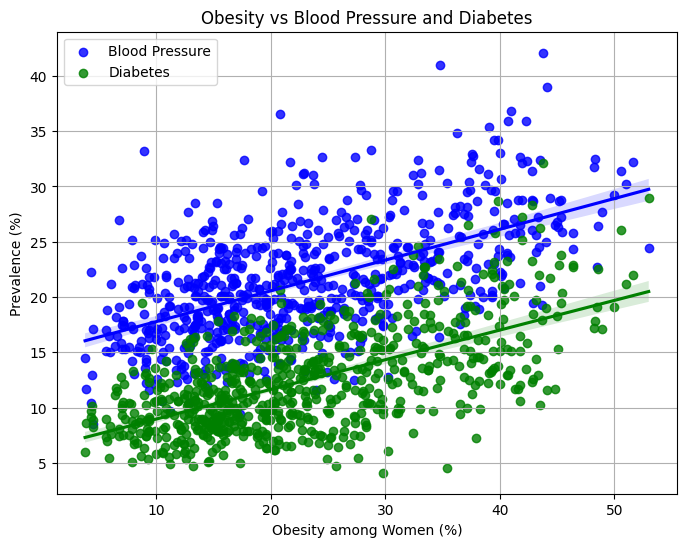

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Obesity vs Blood Pressure
sns.regplot(data=df,
            x='Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)',
            y='Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)',
            scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'}, label='Blood Pressure')

# Obesity vs Diabetes
sns.regplot(data=df,
            x='Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)',
            y='Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)',
            scatter_kws={'color': 'green'}, line_kws={'color': 'green'}, label='Diabetes')

plt.title('Obesity vs Blood Pressure and Diabetes')
plt.xlabel('Obesity among Women (%)')
plt.ylabel('Prevalence (%)')
plt.legend()
plt.grid(True)
plt.show()


### Insights
- Positive Correlation: There is a clear positive correlation between obesity and both hypertension and diabetes among women across districts.

- Stronger BP Link: The association between obesity and blood pressure appears stronger and more consistent than with diabetes, as seen from the steeper and tighter regression line.

- Districts with high female obesity rates may benefit from integrated NCD programs targeting weight management, BP monitoring, and diabetes screening.


---

### 2. Does Better Household Infrastructure Relate to Lower Rates of Child Malnutrition?

### Why This Question Matters
Household infrastructure such as electricity, sanitation, and clean cooking fuel are essential determinants of child health. Poor access can contribute to malnutrition, stunting, and wasting in children under five. This question explores whether improved infrastructure is associated with better nutrition outcomes.

###  Data Used
- **Electricity Access** (%)
- **Improved Sanitation Facility** (%)
- **Use of Clean Cooking Fuel** (%)
- **Stunting in Children under 5** (%)
- **Wasting in Children under 5** (%)

All columns are percentages measured at the district level. The columns have been renamed for better understanding. Children under age 5 is more focussed as it is the age of maximum development.

### Visualization: Correlation Heatmap
We use a heatmap to explore how household-level infrastructure indicators relate to child nutrition metrics.


In [5]:
cols = [
    'Population living in households with electricity (%)',
    'Population living in households that use an improved sanitation facility2 (%)',
    'Households using clean fuel for cooking3 (%)',
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Children under 5 years who are wasted (weight-for-height)18 (%)'
]

df_subset = df[cols].rename(columns={
    'Population living in households with electricity (%)': 'Electricity',
    'Population living in households that use an improved sanitation facility2 (%)': 'Sanitation',
    'Households using clean fuel for cooking3 (%)': 'Clean Fuel',
    'Children under 5 years who are stunted (height-for-age)18 (%)': 'Stunting',
    'Children under 5 years who are wasted (weight-for-height)18 (%)': 'Wasting'
})

for col in df_subset.columns:
    df_subset[col] = df_subset[col].astype(str).str.extract(r'([\d.]+)').astype(float)


Electricity    float64
Sanitation     float64
Clean Fuel     float64
Stunting       float64
Wasting        float64
dtype: object


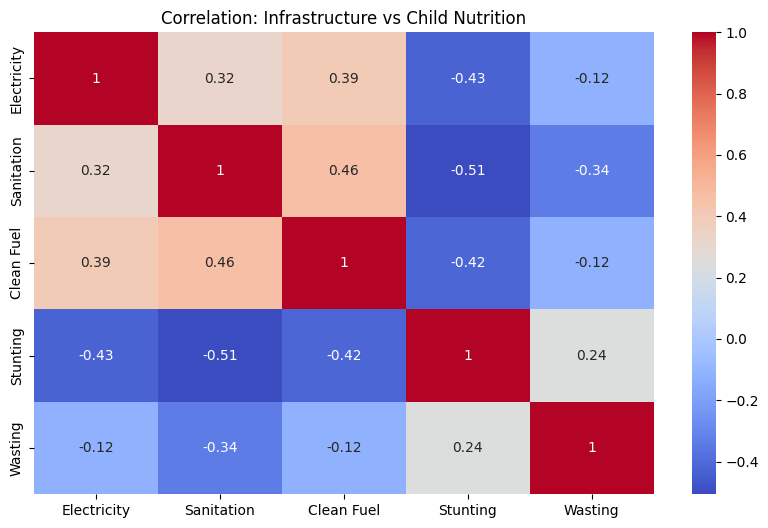

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_subset.dtypes)
plt.figure(figsize=(10, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Infrastructure vs Child Nutrition')
plt.show()


### Insights from the Heatmap: Infrastructure vs Child Nutrition


#### 1. Negative Correlation Between Infrastructure and Stunting

- **Sanitation vs Stunting**: **-0.51** → _Strongest negative correlation_  
- **Electricity vs Stunting**: **-0.43**  
- **Clean Fuel vs Stunting**: **-0.42**

>**_Interpretation_**:  
As access to **sanitation**, **electricity**, and **clean fuel** improves, **stunting** decreases — particularly for sanitation.  
This indicates that better **living conditions** may help reduce **chronic undernutrition** in children.


#### 2.  Weaker Correlation with Wasting

- **Sanitation vs Wasting**: **-0.34**  
- **Electricity & Clean Fuel vs Wasting**: Only **-0.12**

>**_Interpretation_**:  
**Wasting** (a sign of **acute malnutrition**) is **less strongly related** to infrastructure.  
This suggests wasting may be more influenced by **short-term factors** like disease outbreaks, sudden food shortages, or seasonal emergencies, rather than by long-term household infrastructure.


#### 3.  Inter-Infrastructure Correlations

- **Sanitation vs Clean Fuel**: **+0.46**  
- **Electricity vs Clean Fuel**: **+0.39**

>**_Interpretation_**:  
Infrastructure indicators tend to **co-occur**. Districts with good **sanitation** often also have better **clean fuel** and **electricity** access.  
This implies that improvements in one infrastructure domain often align with progress in others — suggesting coordinated development or clustering of resources.

---



### 3. Is there a geographic disparity in institutional births and C-section rates? Do districts with higher health insurance coverage show lower out-of-pocket expenditure during delivery?
### Why This Question Matters
Institutional births and access to C-section deliveries are critical indicators of maternal healthcare accessibility. However, while high institutional delivery rates often reflect good access, very high C-section rates can signal potential overmedicalization and unnecessary interventions.
At the same time, financial protection through health insurance is key to reducing out-of-pocket (OOP) expenditure during deliveries. Understanding whether higher insurance coverage correlates with lower delivery costs helps assess equity in maternal health financing.
This question helps explore both access and affordability of maternal healthcare services across Indian states.

### Data Used
Percentage of institutional births (per state)

Percentage of births delivered via C-section (per state)

Percentage of households covered under any health insurance scheme (per state)

Average out-of-pocket expenditure per delivery in public health facilities

All values were cleaned and converted to float. Averages were computed per state. Since insurance coverage is in percentage and delivery cost is in rupees, the delivery cost was scaled for comparison in the grouped barplot.

### Visualization: Barplots
Three barplots were created:

Top 5 states by institutional births

Top 5 states by C-section rates

Top 5 states with highest insurance coverage and their corresponding (scaled) delivery costs



C:\Users\SHRAVANTHI S\AppData\Local\Temp\ipykernel_9536\2420973076.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_institutional, y='State/UT', x=x1, ax=axes[0][0], palette='Blues_d')
C:\Users\SHRAVANTHI S\AppData\Local\Temp\ipykernel_9536\2420973076.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_csection, y='State/UT', x=y1, ax=axes[0][1], palette='Oranges_d')


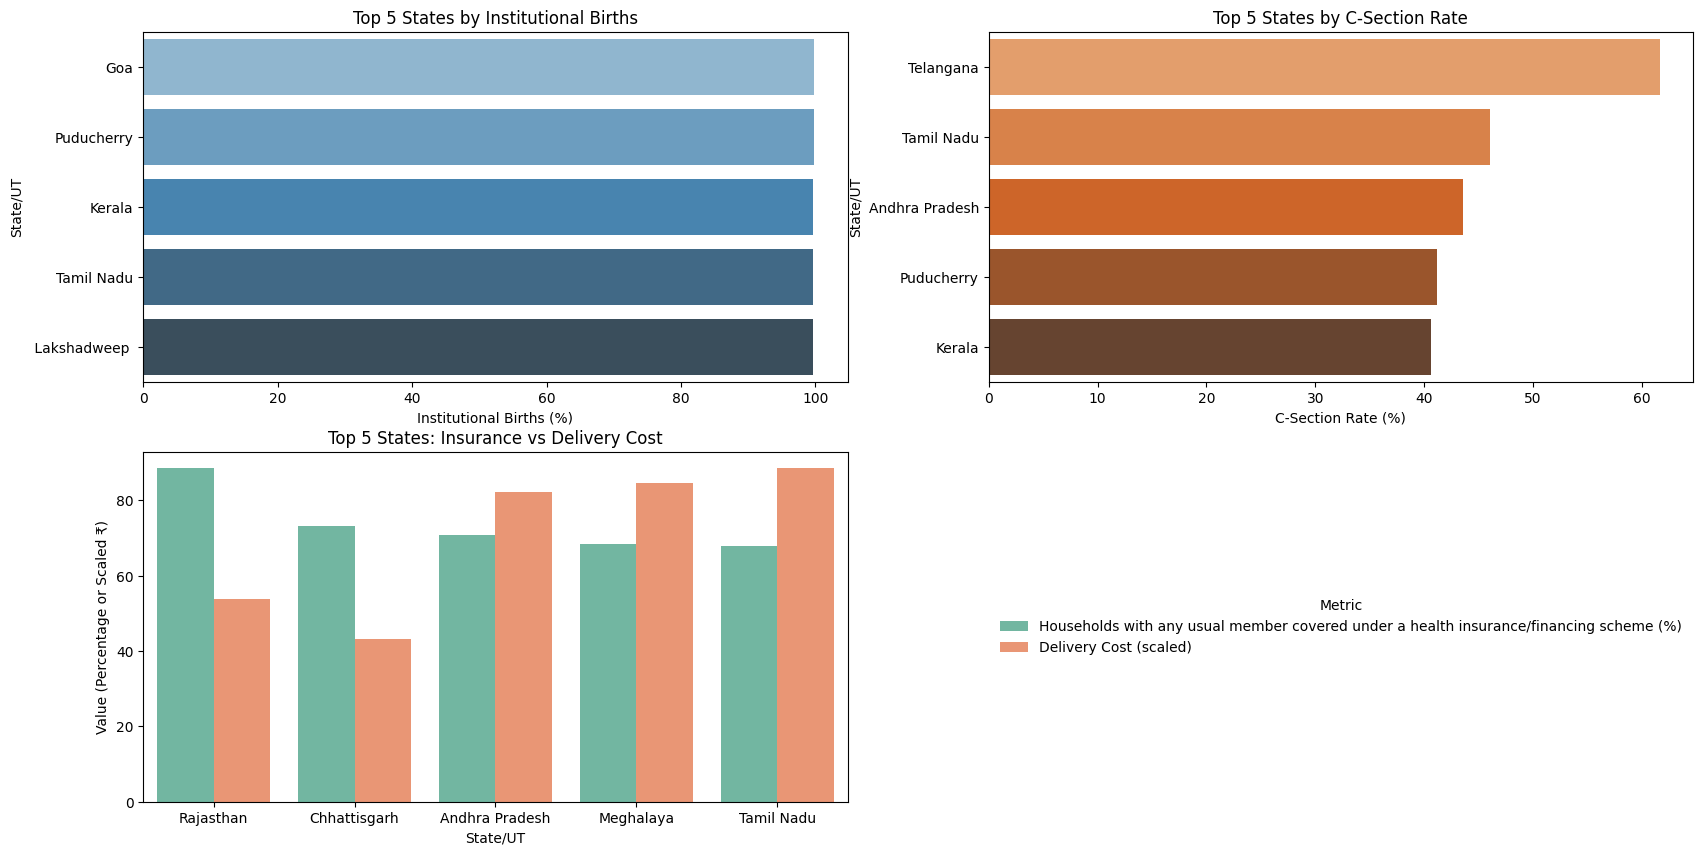

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x1 = 'Institutional births (in the 5 years before the survey) (%)'
y1 = 'Births delivered by caesarean section (in the 5 years before the survey) (%)'
x2 = 'Households with any usual member covered under a health insurance/financing scheme (%)'
y2 = 'Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)'

def clean_column(col):
    return df[col].astype(str).str.replace(',', '').str.extract(r'([\d.]+)')[0].astype(float)

for col in [x1, y1, x2, y2]:
    df[col] = clean_column(col)

df_state_avg = df.groupby('State/UT')[[x1, y1]].mean().reset_index()
df_state_avg1 = df.groupby('State/UT')[[x2, y2]].mean().reset_index()

top5_institutional = df_state_avg.sort_values(by=x1, ascending=False).head(5)
top5_csection = df_state_avg.sort_values(by=y1, ascending=False).head(5)
top5_insurance = df_state_avg1.sort_values(by=x2, ascending=False).head(5)

max_insurance = top5_insurance[x2].max()
max_cost = top5_insurance[y2].max()
top5_insurance['Scaled Cost'] = top5_insurance[y2] * (max_insurance / max_cost)

bar_data = top5_insurance[['State/UT', x2, 'Scaled Cost']].melt(
    id_vars='State/UT',
    var_name='Metric',
    value_name='Value'
)

bar_data['Metric'] = bar_data['Metric'].replace({'Scaled Cost': 'Delivery Cost (scaled)'})

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot 1: Top 5 Institutional Births
sns.barplot(data=top5_institutional, y='State/UT', x=x1, ax=axes[0][0], palette='Blues_d')
axes[0][0].set_title('Top 5 States by Institutional Births')
axes[0][0].set_xlabel('Institutional Births (%)')
axes[0][0].set_ylabel('State/UT')

# Plot 2: Top 5 C-Section Rates
sns.barplot(data=top5_csection, y='State/UT', x=y1, ax=axes[0][1], palette='Oranges_d')
axes[0][1].set_title('Top 5 States by C-Section Rate')
axes[0][1].set_xlabel('C-Section Rate (%)')
axes[0][1].set_ylabel('State/UT')

# Plot 3: Grouped bar plot (Insurance vs Scaled Cost)
barplot=sns.barplot(data=bar_data, x='State/UT', y='Value', hue='Metric', palette='Set2', ax=axes[1][0])
axes[1][0].set_title('Top 5 States: Insurance vs Delivery Cost')
axes[1][0].set_xlabel('State/UT')
axes[1][0].set_ylabel('Value (Percentage or Scaled ₹)')

axes[1][0].legend_.remove()

axes[1][1].axis('off')
handles, labels = barplot.get_legend_handles_labels()
axes[1][1].legend(
    handles=handles,
    labels=labels,
    title='Metric',
    loc='center',
    frameon=False
)

### Insights
1. Top 5 States by Institutional Births
    1.	Goa	~99%
    2.	Puducherry	~99%
    3.	Kerala	~99%
    4.	Tamil Nadu	~99%
    5.	Lakshadweep	~99%

_Observation_: These states have near-universal institutional births, likely due to strong public health infrastructure, awareness, and access.

>_Implication_: High institutional birth rates are typically associated with better maternal and neonatal outcomes.

2. Top 5 States by Caesarean (C-Section) Rates
    1.	Telangana	~62%
    2.	Tamil Nadu	~45%
    3.	Andhra Pradesh	~43%
    4.	Puducherry	~41%
    5.	Kerala	~40%

_Observation_: These C-section rates are significantly above WHO’s recommended limit of 10-15%, suggesting possible overuse, especially in private facilities.

>_Implication_: This may reflect over-medicalization, skewed incentives in private healthcare, or regional health policy norms.

3. Top 5 States by Insurance vs Delivery Cost

| State           | Insurance Coverage (%) | Scaled Delivery Cost (₹) |
|-----------------|------------------------|---------------------------|
| Rajasthan       | High (~90%)            | Low                       |
| Chhattisgarh    | High                   | Low                       |
| Andhra Pradesh  | Medium                 | Medium-High               |
| Meghalaya       | Low                    | High                      |
| Tamil Nadu      | Medium                 | High                      |


_Observation_:

Rajasthan & Chhattisgarh: High insurance coverage correlates with lower delivery cost.

Meghalaya & Tamil Nadu: Low to medium insurance coverage and high costs.

Andhra Pradesh: Moderate on both counts.

>_Implication_:

 Public insurance penetration can reduce financial burden during childbirth, while states with poor insurance coverage may see higher out-of-pocket expenses.

---

### 4. Do Regions with High Antenatal Checkups Also Perform Well in Immunization and Postnatal Care?

#### Why This Question Matters  
Maternal and child health is a continuum that begins with antenatal care (ANC), extends through childbirth, and continues into postnatal care (PNC) and early childhood immunization.  
Understanding whether regions that perform well in **early maternal care** (like ANC checkups) also maintain strong performance in **postnatal care** and **child immunization** helps assess **continuity and consistency of healthcare systems**.  

This question highlights whether **initial engagement with healthcare services (ANC)** translates into **continued care** for both mothers and their children.

#### Data Used  
The following indicators were selected:

- **ANC First Trimester**: Mothers who had a check-up in the first trimester  
- **ANC 4+ Visits**: Mothers who had at least 4 ANC visits  
- **PNC Mothers**: Mothers who received postnatal care within 2 days of delivery  
- **PNC Children**: Children who received postnatal care within 2 days of birth  
- **Fully Vaccinated**: Children aged 12–23 months fully vaccinated  
- **Polio 3 Doses**: Children who received 3 doses of polio vaccine  
- **Measles 1st Dose**: Children who received the first dose of measles-containing vaccine  

All values were cleaned and converted to numeric format for correlation analysis.

#### Visualizations  

**1. Correlation Heatmap**  
- A heatmap shows strong **positive correlations** between:
  - **ANC 4+ Visits** and **PNC for both mothers and children**
  - **ANC indicators** and **Immunization coverage**, especially **Full vaccination** and **Measles 1st dose**

**2. Scatter Plot**  
- The scatter plot between **ANC 4+ Visits** and **Fully Vaccinated Children** shows a **strong upward trend**, implying that regions with better ANC coverage tend to also achieve higher vaccination rates.


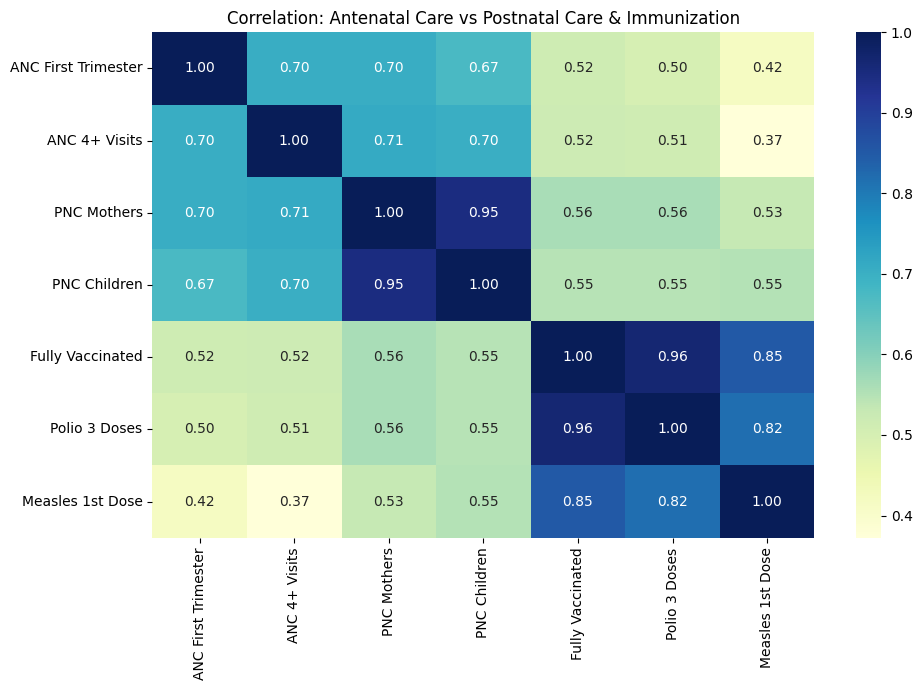

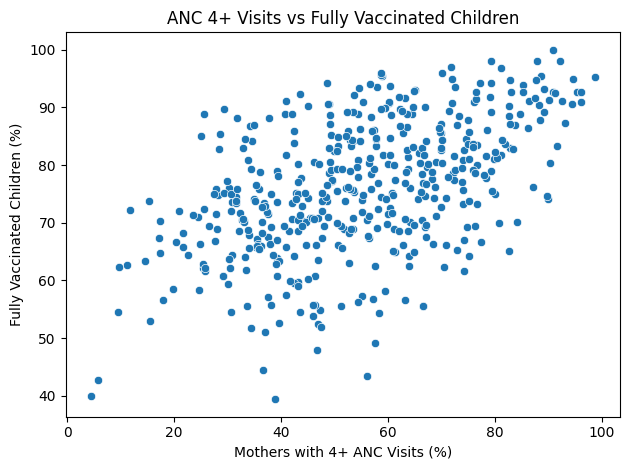

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_selected = df[[
    'Mothers who had an antenatal check-up in the first trimester  (for last birth in the 5 years before the survey) (%)',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
    'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)',
    'Children who received postnatal care from a doctor/nurse/LHV/ANM/midwife/ other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)',
    'Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)',
    'Children age 12-23 months who have received 3 doses of polio vaccine13 (%)',
    'Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)'
]]

df_selected.columns = [
    "ANC First Trimester",
    "ANC 4+ Visits",
    "PNC Mothers",
    "PNC Children",
    "Fully Vaccinated",
    "Polio 3 Doses",
    "Measles 1st Dose"
]
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 7))
sns.heatmap(df_selected.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation: Antenatal Care vs Postnatal Care & Immunization")
plt.tight_layout()
plt.show()

sns.scatterplot(
    data=df_selected,
    x="ANC 4+ Visits",
    y="Fully Vaccinated"
)
plt.title("ANC 4+ Visits vs Fully Vaccinated Children")
plt.xlabel("Mothers with 4+ ANC Visits (%)")
plt.ylabel("Fully Vaccinated Children (%)")
plt.tight_layout()
plt.show()


####  Key Insights  

- **Antenatal care coverage is a strong predictor** of both postnatal care and immunization outcomes.  
- States that invest in **maternal health infrastructure and outreach** early in pregnancy seem to maintain consistent care for newborns and infants.  
- **Integrated maternal and child health programs** may be effectively implemented in these areas, highlighting successful health system delivery.

> This suggests that **early healthcare engagement** is likely to lead to better outcomes across the maternal and child health continuum, reinforcing the importance of early ANC interventions.

---

### 5. Do Districts with Higher Early Marriage Rates Also Show Higher Rates of Adolescent Pregnancy and School Dropout?


####  Why This Question Matters  
Early marriage often leads to **adolescent pregnancy**, and both are commonly associated with **school dropout**, especially among young girls.  
By exploring the relationship between early marriage, teen pregnancy, and educational attainment, we can better understand how **social norms and gender inequality** intersect to limit **health, education, and life opportunities** for young women.

This question targets the **social determinants of reproductive and educational outcomes**.


####  Data Used  

The following columns were selected and cleaned:

- **Early Marriage**: % of women aged 20–24 who were married before age 18  
- **Teen Pregnancy**: % of women aged 15–19 who were already mothers or pregnant  
- **Schooling 10+ Years**: % of women aged 15–49 who completed 10 or more years of schooling  

A **proxy for dropout** is considered as lower values in "Schooling 10+ Years".

All columns were converted to numeric and cleaned of missing values.


####  Visualisation: Pairplot  

A pairplot was created to show:

- **Positive correlation** between **Early Marriage** and **Teen Pregnancy**  
- **Negative relationship** between **Early Marriage** and **Schooling 10+ Years**  
- **Teen Pregnancy** also shows a **negative association** with **schooling**

These trends support the hypothesis that **districts with higher rates of early marriage** tend to have **higher adolescent pregnancy** and **lower levels of female education**.


Early Marriage         float64
Teen Pregnancy         float64
Schooling 10+ Years    float64
dtype: object


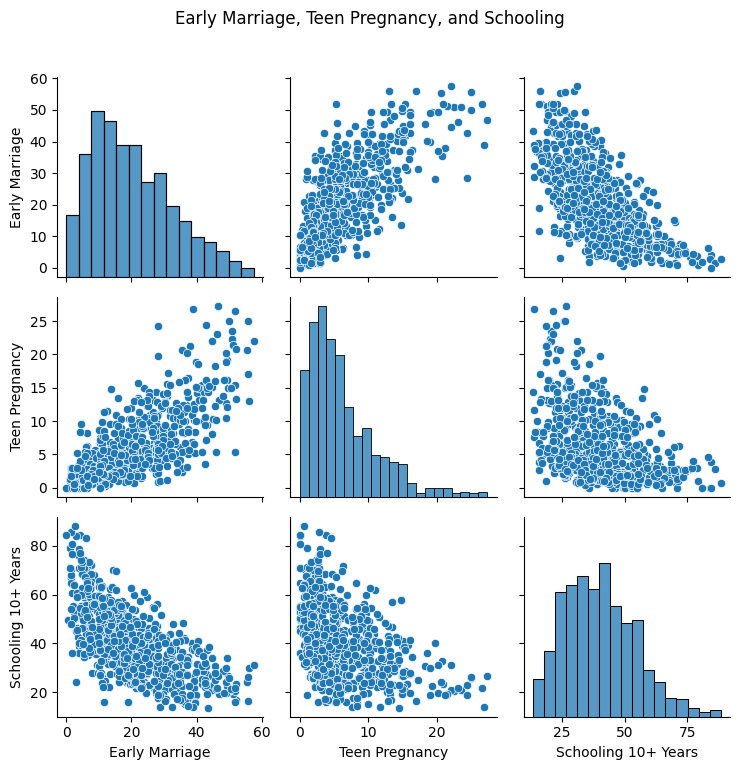

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("datafile.csv")

df = df.rename(columns={
    'Women age 20-24 years married before age 18 years (%)': 'Early Marriage',
    'Women age 15-19 years who were already mothers or pregnant at the time of the survey (%)': 'Teen Pregnancy',
    'Women (age 15-49)  with 10 or more years of schooling (%)': 'Schooling 10+ Years'
})

df_clean = df[['Early Marriage', 'Teen Pregnancy', 'Schooling 10+ Years']].dropna().copy()

for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


df_plot = df_clean[['Early Marriage', 'Teen Pregnancy', 'Schooling 10+ Years']]

print(df_plot.dtypes)

sns.pairplot(df_plot)
plt.suptitle("Early Marriage, Teen Pregnancy, and Schooling", y=1.02)
plt.tight_layout()
plt.show()


#### Key Insights  

- **Early Marriage → Teen Pregnancy**: Districts with high early marriage rates also show significantly higher adolescent pregnancy rates.  
- **Early Marriage → Schooling Years**: There's a strong negative association between early marriage and the proportion of women with 10+ years of schooling.  
- **Teen Pegnancy->Schooling Years**: There's also a strong negative correlation which clearly tells points out the effect of early pregnancy on girl education.
- **Cycle of Vulnerability**: These relationships reveal a cycle where early marriage and early childbearing hinder educational attainment, reinforcing gender-based disadvantages.

> These findings point to the need for **targeted policies** that delay age at marriage, support girls' education, and reduce adolescent pregnancies through awareness, incentives, and legal enforcement.
----